In [120]:
import pandas as pd
import numpy as np
import tensorflow as tf
import scikeras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [74]:
music = pd.read_csv("MusicDataset.csv")
music.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [75]:
music.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [76]:
music = music.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'mode', 'track_genre', 'explicit'], axis = 1)
music.describe

<bound method NDFrame.describe of         popularity  duration_ms  danceability  energy  key  loudness  \
0               73       230666         0.676  0.4610    1    -6.746   
1               55       149610         0.420  0.1660    1   -17.235   
2               57       210826         0.438  0.3590    0    -9.734   
3               71       201933         0.266  0.0596    0   -18.515   
4               82       198853         0.618  0.4430    2    -9.681   
...            ...          ...           ...     ...  ...       ...   
113995          21       384999         0.172  0.2350    5   -16.393   
113996          22       385000         0.174  0.1170    0   -18.318   
113997          22       271466         0.629  0.3290    0   -10.895   
113998          41       283893         0.587  0.5060    7   -10.889   
113999          22       241826         0.526  0.4870    1   -10.204   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.1430        

In [77]:
music.isnull().sum()

popularity          0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [78]:
x = music.drop(columns = 'valence')
x

,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,125.995,5
113996,22,385000,0.174,0.1170,0,-18.318,0.0401,0.9940,0.976000,0.1050,85.239,4
113997,22,271466,0.629,0.3290,0,-10.895,0.0420,0.8670,0.000000,0.0839,132.378,4
113998,41,283893,0.587,0.5060,7,-10.889,0.0297,0.3810,0.000000,0.2700,135.960,4


In [79]:
y = music['valence']
y

0         0.7150
1         0.2670
2         0.1200
3         0.1430
4         0.1670
           ...  
113995    0.0339
113996    0.0350
113997    0.7430
113998    0.4130
113999    0.7080
Name: valence, Length: 114000, dtype: float64

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.45, random_state = 88)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(62700, 12)
(51300, 12)
(62700,)
(51300,)


In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X_train, Y_train)

LinearRegression()

In [84]:
c = lr.intercept_
c

-0.29235370656701665

In [85]:
m = lr.coef_
m

array([-8.40087069e-04, -2.41551768e-07,  6.89054840e-01,  4.52609831e-01,
        9.53466803e-04, -7.45573228e-03, -2.57457198e-01,  1.88120099e-01,
       -2.03561058e-01,  2.67820840e-02,  5.97157012e-04,  4.40892889e-03])

In [86]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([0.58012965, 0.71823026, 0.14297334, ..., 0.72052192, 0.63402894,
       0.37616295])

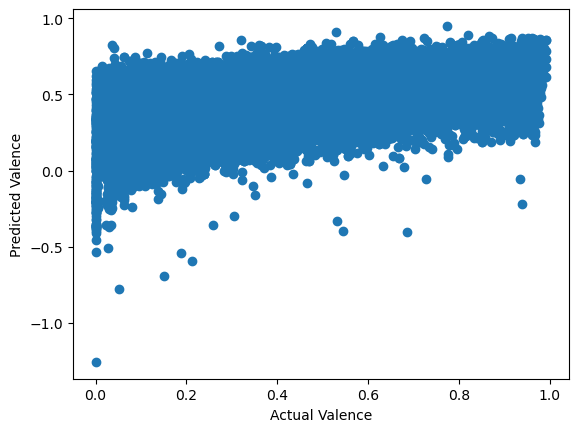

In [87]:
plt.scatter(Y_train, y_pred_train)
plt.xlabel("Actual Valence")
plt.ylabel("Predicted Valence")
plt.show()

In [97]:
r2_score(Y_train, y_pred_train)

0.3695538763924342

## ANN Trial 1

In [106]:
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=12, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
 
# Fitting the ANN to the Training set
model.fit(X_train, Y_train ,batch_size = 20, epochs = 15, verbose=1)

Epoch 1/15


C:\Users\madzi\.anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3135/3135 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0018 - loss: 0.0787
Epoch 2/15
3135/3135 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0015 - loss: 0.0676
Epoch 3/15
3135/3135 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0015 - loss: 0.0678
Epoch 4/15
3135/3135 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0017 - loss: 0.0675
Epoch 5/15
3135/3135 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0015 - loss: 0.0676
Epoch 6/15
3135/3135 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0014 - loss: 0.0674
Epoch 7/15
3135/3135 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0013 - loss: 0.0670
Epoch 8/15
3135/3135 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0015 - loss: 0.0675
Epoch 9/15
3135/3135 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0017 - loss: 0.0676
Epoch 10/15
3135/3135 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.0014 - loss: 0.0675
Epoch 11/15
3135/3135 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0016 - loss: 0.0675
Epoch 12/15
3135/3135 ━━━━━━━━━━━━━

In [107]:
score = model.evaluate(x, y, verbose=1)
score

3563/3563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 3.7182e-04 - loss: 0.0671


[0.067219577729702, 0.0015438596019521356]

In [91]:
y_pred = model.predict(x)
l = len(y)
acc = sum([np.round(y_pred[i])==y[i] for i in range(l)])/l
print("The accuracy of the model is", acc)

3563/3563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
The accuracy of the model is [0.00154386]


## ANN #2

In [103]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [104]:
model2.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [105]:
model2.fit(X_train, Y_train, epochs = 15)

Epoch 1/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 9.7896e-04 - loss: 37630.5586
Epoch 2/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0015 - loss: 58.1801
Epoch 3/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0015 - loss: 8.8304
Epoch 4/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0018 - loss: 0.0035
Epoch 5/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0014 - loss: 0.0020
Epoch 6/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0014 - loss: 8.4680e-04
Epoch 7/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0015 - loss: 4.1249e-04
Epoch 8/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0014 - loss: 1.7397e-04
Epoch 9/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0017 - loss: 2.4504e-04
Epoch 10/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0014 - loss: 4.9061e-05
Epoch 11/15
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0015 - loss: 1.2523e

In [102]:
model2.evaluate(X_test, Y_test)

1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0014 - loss: 0.0000e+00


[0.0, 0.0015399609692394733]

## Random Forest

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.25, random_state = 267)

In [117]:
musicclf = RandomForestRegressor(n_estimators = 15, random_state = 5, oob_score = True)

In [118]:
musicclf.fit(X_train, Y_train)

C:\Users\madzi\.anaconda\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=15, oob_score=True, random_state=5)

In [122]:
predictions = musicclf.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
print("Mean squared error: ", mse)

r2 = r2_score(Y_test, predictions)
print("R-Square: ", r2)

Mean squared error:  0.024713091028433283
R-Square:  0.6307757665018124
